1. Importing and reading MPO Boundaries and zip code areas

In [1]:
import rasterio
from rasterio.plot import show
from rasterio import features

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import richdem as rd
from scipy import ndimage
from rasterstats import zonal_stats
import contextily as cx


In [2]:
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\olivi\UEP239_Final_Project


In [3]:
boundaries = gpd.read_file('data/MPO_Boundaries/MPO_Boundaries/MPO_Boundaries.shp')

In [4]:
boundaries.head()

,OBJECTID,MPO,created_us,created_da,last_edite,last_edi_1,GlobalID,ShapeSTAre,ShapeSTLen,geometry
0,2,Berkshire,None,1970-01-01,None,1970-01-01,{08FDA544-18B0-412A-B442-287E53E987F7},2.451015e+09,2.471530e+05,"POLYGON ((-8128884.676 5272654.345, -8128962.2..."
1,3,Cape Cod,None,1970-01-01,None,1970-01-01,{B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01},1.067067e+09,1.288227e+06,"MULTIPOLYGON (((-7813968.781 5173329.197, -781..."
2,4,Central Massachusetts,None,1970-01-01,None,1970-01-01,{CC777E14-53C8-42AD-B421-71444DA0BB60},2.487546e+09,2.683265e+05,"POLYGON ((-7977225.352 5223837.273, -7973861.8..."
3,5,Franklin,None,1970-01-01,None,1970-01-01,{4804E708-6B89-4A85-9383-BD91F7589981},1.876456e+09,2.527017e+05,"POLYGON ((-8046511.241 5269691.856, -8045276.8..."
4,6,Montachusett,None,1970-01-01,None,1970-01-01,{F315DA63-C9CF-40EE-8AA7-5ABA2E1FD528},1.772355e+09,2.748684e+05,"POLYGON ((-7976246.504 5267152.001, -7976121.9..."


<AxesSubplot:>

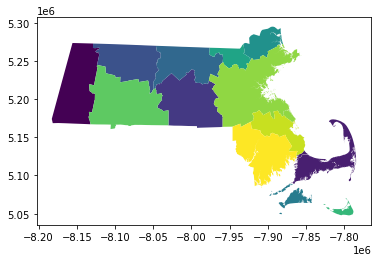

In [5]:
boundaries.plot(column='OBJECTID')

In [6]:
zipcodes = gpd.read_file('data/zipcodes/zipcodes/tl_2010_25_zcta510.shp')

In [7]:
zipcodes.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((-70.59239 41.56006, -70.59268 41.559..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((-70.62389 41.61673, -70.62633 41.617..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((-70.62389 41.61673, -70.62262 41.616..."
3,25,02646,2502646,B5,G6350,S,7798581,801405,+41.6705961,-070.0714493,N,"POLYGON ((-70.07925 41.67769, -70.07864 41.677..."
4,25,01237,2501237,B5,G6350,S,160121626,1140685,+42.5478177,-073.2680327,N,"POLYGON ((-73.23558 42.49333, -73.23587 42.493..."


<AxesSubplot:>

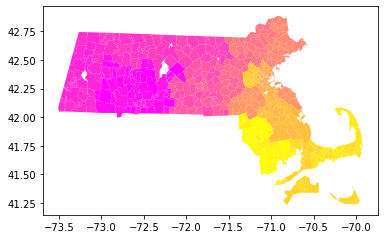

In [8]:
zipcodes.plot(column='GEOID10', cmap='spring')

In [9]:
boundaries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

2. Changing projection to MA State Plane 

In [10]:
boundaries = boundaries.to_crs("epsg:26986") #MA State Plane Projection

In [11]:
zipcodes = zipcodes.to_crs("epsg:26986") #MA State Plane Projection

3. Clip zip code layer to Boston Region MPO

In [12]:
boston_region = boundaries[boundaries.MPO=="Boston Region"].copy()

<AxesSubplot:>

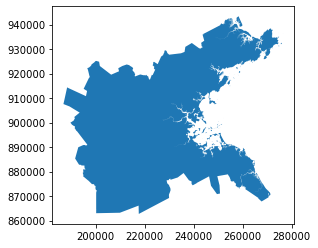

In [13]:
boston_region.plot()

In [14]:
boston_zipcodes = gpd.clip(zipcodes, boston_region)

<AxesSubplot:>

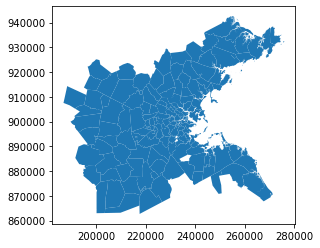

In [15]:
boston_zipcodes.plot()

4. Display data for schools by zip code

In [16]:
schools = gpd.read_file('data/schools/schools/SCHOOLS_PT.shp')

In [17]:
schools

,SCHID,NAME,ADDRESS,TOWN_MAIL,TOWN,ZIPCODE,PHONE,GRADES,TYPE,TYPE_DESC,DIST_NAME,DIST_CODE,MAD_ID,TYPE_DESC2,geometry
0,03090020,Stanley M Koziol Elementary School,4 Gould Road,Ware,WARE,01082,413-967-6236,"PK,K,01,02,03",ELE,Public Elementary,Ware,03090000,1003108,None,POINT (137104.992 889501.256)
1,06220010,Millville Elementary School,122 Berthelette Way,Millville,MILLVILLE,01529,508-876-0177,"PK,K,01,02,03,04,05",ELE,Public Elementary,Blackstone-Millville,06220000,1708902,None,POINT (193535.347 864680.374)
2,00440080,Frederick Douglass Academy,175 Warren Avenue,Brockton,BROCKTON,02301,508-580-7033,"06,07,08,09,10,11,12",SEC,Public Secondary,Brockton,00440000,3278046,None,POINT (239410.709 870353.747)
3,04560050,Lowell Community Charter Public School,206 Jackson Street,Lowell,LOWELL,01852,978-323-0800,"PK,K,01,02,03,04,05,06,07,08",CHA,Charter,Lowell Community Charter,04560000,1978735,None,POINT (215408.324 932324.148)
4,02390005,Cold Spring School,25 Alden Street,Plymouth,PLYMOUTH,02360,508-830-4335,"K,01,02,03,04,05",ELE,Public Elementary,Plymouth,02390000,2176192,None,POINT (268146.542 857250.077)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,04390050,Conservatory Lab Charter School,2120 Dorchester Avenue,Dorchester,BOSTON,02124,617-254-8904,"PK,K,01,02,03,04,05,06,07,08",CHA,Charter,Conservatory Lab Charter,04390000,35164510,None,POINT (235821.855 891970.515)
2455,01490890,Notre Dame Cristo Rey High School,303 Haverhill Street,Lawrence,LAWRENCE,01840,978-689-8222,"09,10,11,12",PRI,Private,None,None,2124790,None,POINT (227235.383 940010.302)
2456,01140505,Greenfield High School,21 Barr Avenue,Greenfield,GREENFIELD,01301,413-772-1350,"08,09,10,11,12",SEC,Public Secondary,Greenfield,01140000,214271,None,POINT (110192.653 928865.753)
2457,02010803,Early Learning Child Care,322 Maxfield Street,New Bedford,NEW BEDFORD,02740,508-996-3774,PK,PRI,Private,None,None,None,None,POINT (246957.232 821204.731)


In [18]:
boston_zipcodes

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
17,25,01905,2501905,B5,G6350,S,9219345,1195154,+42.4659985,-070.9757922,N,"MULTIPOLYGON (((243877.753 913824.638, 243872...."
18,25,01904,2501904,B5,G6350,S,11708211,1303900,+42.4924563,-070.9739297,N,"POLYGON ((245700.484 914778.700, 245667.412 91..."
20,25,01930,2501930,B5,G6350,S,67847425,13972397,+42.6199100,-070.6818235,N,"MULTIPOLYGON (((261745.067 931625.267, 261822...."
21,25,01915,2501915,B5,G6350,S,39091336,3958118,+42.5702688,-070.8669962,N,"MULTIPOLYGON (((250787.714 926889.372, 251155...."
22,25,01921,2501921,B5,G6350,S,61010486,2188501,+42.6831083,-071.0183302,N,"MULTIPOLYGON (((245193.985 936821.773, 244097...."
...,...,...,...,...,...,...,...,...,...,...,...,...
526,25,02129,2502129,B5,G6350,S,3492181,1266666,+42.3796570,-071.0614875,N,"MULTIPOLYGON (((235381.204 902518.358, 235374...."
527,25,02128,2502128,B5,G6350,S,12561059,2952872,+42.3611289,-071.0069754,N,"MULTIPOLYGON (((240184.037 905141.775, 240204...."
528,25,02122,2502122,B5,G6350,S,5263269,1641767,+42.2914125,-071.0421575,N,"MULTIPOLYGON (((237311.389 892366.860, 237300...."
529,25,02151,2502151,B5,G6350,S,15190546,3291332,+42.4182938,-071.0012566,N,"MULTIPOLYGON (((240204.477 905138.116, 240184...."


In [19]:
boston_zipcodes.rename(columns = {"ZCTA5CE10" : "ZIPCODE"}, inplace = True)

In [20]:
boston_zipcodes = boston_zipcodes[['ZIPCODE', 'ALAND10', 'geometry']]

In [21]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry
17,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872...."
18,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91..."
20,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822...."
21,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155...."
22,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097...."
...,...,...,...
526,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374...."
527,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204...."
528,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300...."
529,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184...."


In [22]:
schools_count = schools[['SCHID', 'ZIPCODE']].groupby('ZIPCODE').nunique().reset_index()

In [23]:
schools_count.rename(columns = {"SCHID" : "school_count"}, inplace = True)

In [24]:
schools_count

,ZIPCODE,school_count
0,01001,7
1,01002,8
2,01004,1
3,01005,4
4,01007,5
...,...,...
456,02771,4
457,02777,9
458,02779,2
459,02780,15


In [25]:
boston_zipcodes = boston_zipcodes.merge(schools_count, how='left', on='ZIPCODE')

In [26]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0
...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0


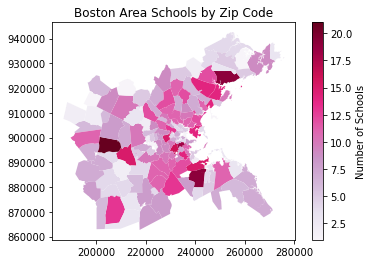

In [27]:
schools_map = boston_zipcodes.plot(legend=True,column='school_count',cmap = 'PuRd',legend_kwds={'label':'Number of Schools'}).set_title('Boston Area Schools by Zip Code')

4. Display data for libraries by zip code

In [28]:
libraries = gpd.read_file('data/libraries/libraries/LIBRARIES_PT.shp')

In [29]:
libraries

,NAME,ADDRESS,TOWN,STATE,ZIP,TYPE,ADDRESS_PO,LIBKEY,NETWORK,REGION,DELIVROUTE,WEBSITE,geometry
0,EGREMONT FREE LIBRARY,1 BUTTONBALL LANE,EGREMONT,MA,01230,PUBLIC,M_42081_880811,PU-EGREMONT-FREE,C/WMARS,Western,Optima,http://egremont-ma.gov/,POINT (42080.824 880810.865)
1,FLORIDA FREE PUBLIC LIBRARY,56 NORTH COUNTY ROAD,FLORIDA,MA,01247,PUBLIC,M_73999_939186,PU-FLORIDA-FREE,C/WMARS,Western,Optima,None,POINT (73998.820 939185.588)
2,HOLYOKE PUBLIC LIBRARY,250 CHESTNUT STREET,HOLYOKE,MA,01040,PUBLIC,M_108126_884338,PU-HOLYOKE-PUBLIC,C/WMARS,Western,Optima,http://www.holyokelibrary.org,POINT (108125.885 884337.953)
3,MASON SQUARE BRANCH LIBRARY,765 STATE STREET,SPRINGFIELD,MA,01109,PUBLIC BRANCH,M_111823_873863,PU-SPRINGFI-CITY,C/WMARS,Western,Optima,http://www.springfieldlibrary.org/,POINT (111822.608 873862.592)
4,NORTH ADAMS PUBLIC LIBRARY,74 CHURCH STREET,NORTH ADAMS,MA,01247,PUBLIC,M_68185_939879,PU-NADAMS-PUBLIC,C/WMARS,Western,Optima,http://www.naplibrary.com,POINT (68185.483 939879.244)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,MIDDLEFIELD PUBLIC LIBRARY,188 SKYLINE TRAIL,MIDDLEFIELD,MA,01243,PUBLIC,M_75622_900447,PU-MIDDLEFI-PUBLIC,None,Western,Optima,http://middlefieldma.net/?page_id=172,POINT (75613.611 900456.660)
466,GRISWOLD MEMORIAL LIBRARY,12 MAIN ROAD,COLRAIN,MA,01340,PUBLIC,M_101678_936447,PU-COLRAIN-GRISWOLD,C/WMARS,Western,Optima,http://colrain-ma.gov/departments/library.html,POINT (101678.371 936446.501)
467,TYLER MEMORIAL LIBRARY,157 MAIN STREET,CHARLEMONT,MA,01339,PUBLIC,M_87563_931780,PU-CHARLEMO-TYLER,C/WMARS,Western,Optima,http://www.charlemont-ma.us/town/tyler-memoria...,POINT (87563.123 931783.458)
468,WESTHAMPTON PUBLIC LIBRARY,1 NORTH ROAD,WESTHAMPTON,MA,01027,PUBLIC,M_94935_895687,PU-WESTHAMP-MEMORIAL,C/WMARS,Western,Optima,https://www.westhampton-ma.com/westhampton-pub...,POINT (94935.281 895687.373)


In [30]:
lib_count = libraries[['NAME', 'ZIP']].groupby('ZIP').nunique().reset_index()

In [31]:
lib_count

,ZIP,NAME
0,01001,1
1,01002,4
2,01005,1
3,01007,1
4,01008,1
...,...,...
412,02771,1
413,02777,1
414,02779,1
415,02780,1


In [32]:
lib_count.rename(columns = {"ZIP" : "ZIPCODE"}, inplace = True)

In [33]:
lib_count.rename(columns = {"NAME" : "lib_count"}, inplace = True)

In [34]:
lib_count

,ZIPCODE,lib_count
0,01001,1
1,01002,4
2,01005,1
3,01007,1
4,01008,1
...,...,...
412,02771,1
413,02777,1
414,02779,1
415,02780,1


In [35]:
boston_zipcodes = boston_zipcodes.merge(lib_count, how='left', on='ZIPCODE')

In [36]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0
...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0


AttributeError: 'Text' object has no attribute 'axis'

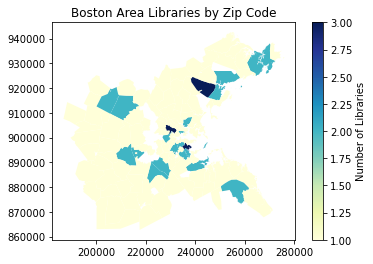

In [52]:
libraries_map = boston_zipcodes.plot(legend=True,column='lib_count',cmap = 'YlGnBu',legend_kwds={'label':'Number of Libraries'}).set_title('Boston Area Libraries by Zip Code')

In [38]:
farmers_markets = gpd.read_file('data/farmers_markets/farmers_markets/FARMERSMARKETS_PT.shp')

In [39]:
farmers_markets

,MARKET_ID,NAME,TYPE,ADDR_1,ADDR_2,TOWN,ZIP_CODE,DAY_TIME,DATES,UPDATE_DAT,YEAR_START,WEBSITE,EBT,WIC_CVV,COUPONS,LONGITUDE,LATITUDE,geometry
0,606.0,Sustainable Nantucket/Wednesday,Farmers Markets,113 Pleasant St.,Next to Glidden's Seafood,Nantucket,02554,"Wednesday, 3:30 pm - 6:30 pm",July 6 to September 14,2016,2016,http://www.sustainablenantucket.org,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-70.09361,41.27301,POINT (317843.084 781295.223)
1,607.0,Holden/Market on Main at Jed's,Farmers Markets,450 Main St.,Jed's Hardware and Garden,Holden,01520,"Friday, 3:30 pm - 7:00 pm",May 20 to October 28,2016,2016,None,None,None,None,-71.83454,42.33213,POINT (172428.679 898013.943)
2,535.0,West Newton,Farmers Markets,Elm Street,off Washington Street,West Newton,02465,"Saturday, 10:00 am - 2:00 pm",June 18 to October 8,2016,2014,http://www.newtonma.gov/gov/parks,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-71.22932,42.34906,POINT (222302.311 899875.783)
3,538.0,Plainville,Farmers Markets,200 South Street,Old Wood School,Plainville,02762,"Sunday, 10:00 am - 2:00 pm",May 25 to November 2,2015,2014,http://www.plainvillefarmersmarket.com/,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-71.33843,42.00941,POINT (213383.817 862127.128)
4,539.0,Worcester Art Museum,Farmers Markets,Lancaster St.,Worcester Art Museum,Worcester,01609,"Saturdays, 10:00 am - 1:00 pm",July 11 to August 29,2015,2014,None,None,None,WIC & Senior Coupons Accepted,-71.80202,42.27328,POINT (175085.678 891467.195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,578.0,Dorchester/Carney Hospital,Winter Markets,2100 Dorchester Ave.,"Carney Hospital, by Seton Building Entrance",Boston,02124,"Wednesday, 8:00 am - Noon",Year- Round,2015,2015,None,EBT-SNAP Accepted,None,None,-71.06634,42.27898,POINT (235770.310 892147.144)
297,590.0,Mattapoisett,Farmers Markets,57 Fairhaven Rd.,Knights of Columbus Hall,Mattapoisett,02739,"Wednesday, 3:00 pm - 7:00 pm",Year-Round,2015,2015,None,None,None,WIC & Senior Coupons Accepted,-70.82973,41.65840,POINT (255828.322 823347.633)
298,591.0,Mattapoisett Winter,Winter Markets,57 Fairhaven Rd.,Knights of Columbus Hall,Mattapoisett,02739,"Wednesday, 3:00 pm - 7:00 pm",Year-Round,2015,2015,None,None,None,None,-70.82973,41.65840,POINT (255828.322 823347.633)
299,592.0,Southbridge/Big Bunny,Farmers Markets,942 Main St.,Big Bunny Market,Worcester,01550,"Saturday, 9:00 am - 2:00 pm",May 28 to October 8,2016,2015,http://www.facebook.com/Big-Bunny-Farmers-Mark...,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-72.04777,42.08311,POINT (154677.764 870445.889)


In [40]:
market_count = farmers_markets[['MARKET_ID', 'ZIP_CODE']].groupby('ZIP_CODE').nunique().reset_index()

In [41]:
market_count

,ZIP_CODE,MARKET_ID
0,00000,1
1,01002,3
2,01005,1
3,01007,1
4,01010,1
...,...,...
219,02760,2
220,02762,1
221,02769,1
222,02780,1


In [42]:
market_count.rename(columns = {"ZIP_CODE" : "ZIPCODE"}, inplace = True)

In [43]:
market_count.rename(columns = {"MARKET_ID" : "market_count"}, inplace = True)

In [44]:
boston_zipcodes = boston_zipcodes.merge(market_count, how='left', on='ZIPCODE')

In [45]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN
...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0


AttributeError: 'Text' object has no attribute 'to_crs'

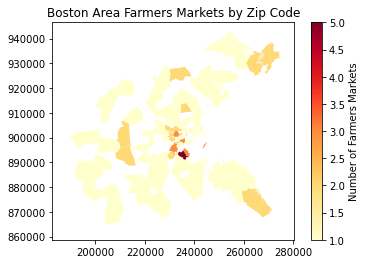

In [56]:
markets_map = boston_zipcodes.plot(legend=True,column='market_count',cmap = 'YlOrRd',legend_kwds={'label':'Number of Farmers Markets'}).set_title('Boston Area Farmers Markets by Zip Code')
cx.add_basemap(markets_map)

In [49]:
with rasterio.open('data/landcover.tif') as landcover_raster:
    shape = landcover_raster.shape
    transform = landcover_raster.transform
    res = landcover_raster.res
    crs = landcover_raster.crs
    nodata = landcover_raster.nodata
    bounds = landcover_raster.bounds
    landcover = landcover_raster.read(1)

In [50]:
landcover_raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 3322,
 'height': 3024,
 'count': 1,
 'crs': CRS.from_epsg(6491),
 'transform': Affine(30.0, 0.0, 181770.0,
        0.0, -30.0, 948390.0)}

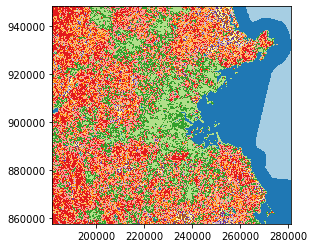

In [51]:
show(landcover, transform=transform, cmap='Paired')
plt.show()

In [58]:
land_reclass = np.full(shape, np.NaN)

In [59]:
land_reclass[(landcover == 11) | (landcover == 90) | (landcover == 95)] = 1


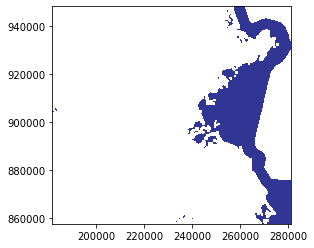

In [81]:
show(land_reclass, transform=transform, cmap='RdYlBu_r')
plt.show()

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'